In [31]:
from qiskit import *
from qiskit.circuit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import *
from qiskit.quantum_info import DensityMatrix
import numpy as np
from qiskit.tools.monitor import job_monitor
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
from qiskit.quantum_info import state_fidelity

In [16]:
#After optimization we get equations in 2 bits, based on which the best solution is searched using Grover's algorithm.

def CircuitInitialize(meas):
    
    #Circuit generation
    qr = QuantumRegister(2, "bit")
    cr = ClassicalRegister(2, "value")
    qc = QuantumCircuit(qr,cr)

    qc.h(qr)
    qc.cx(qr[0],qr[1])
    qc.rz(-np.pi/2,qr[1])
    qc.cx(qr[0],qr[1])
    qc.h(qr)
    qc.x(qr)
    qc.rz(np.pi/4,qr[1])
    qc.cx(qr[0],qr[1])
    qc.rz(-np.pi/4,qr[1])
    qc.cx(qr[0],qr[1])
    qc.rz(np.pi/4,qr[0])
    qc.barrier()

    qc.x(qr)
    qc.h(qr)
    
    if (meas == "1"):
        
        qc.measure(qr,cr)

#     qc.draw(output="mpl")
    
    return qc

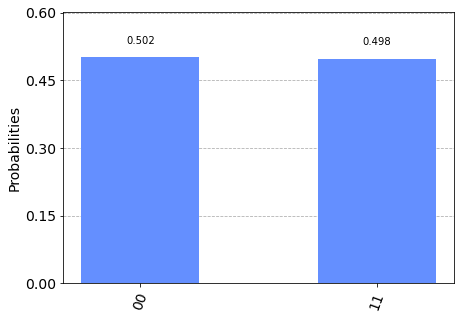

In [4]:
#Getting the resultant phase inverted states as histogram

circuit = CircuitInitialize('1')
backend = Aer.get_backend('qasm_simulator')
results = execute(circuit,backend, shots=1024).result().get_counts()
plot_histogram(results)
# print (results)

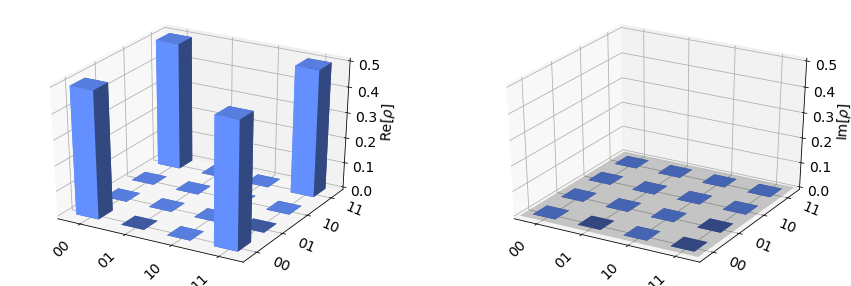

In [5]:
#Getting the Density Matrix plot

circuit = CircuitInitialize('0')

state = DensityMatrix.from_instruction(circuit)
plot_state_city(state)


### Running simulation on IBMQ Yorktown (5 qubits)



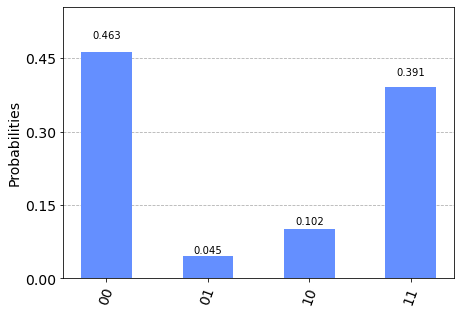

In [14]:
circuit = CircuitInitialize('1')
backend = IBMQ.get_provider().get_backend('ibmq_5_yorktown')
job_york = execute(circuit,backend,shots=1024)

results = job_york.result()
answer = results.get_counts(circuit)
plot_histogram(answer)

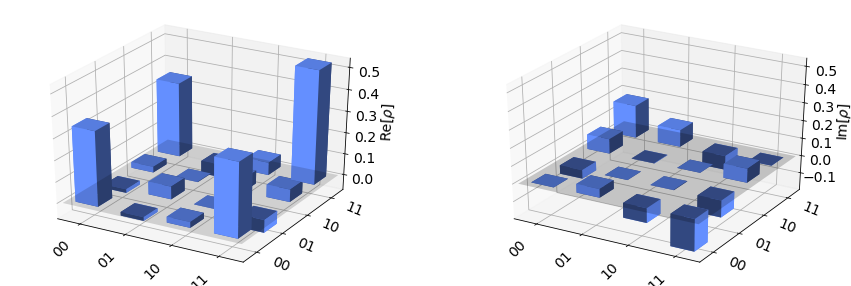

In [34]:
qr = QuantumRegister(2, "bit")
qc = QuantumCircuit(qr)

qc.h(qr)
qc.cx(qr[0],qr[1])
qc.rz(-np.pi/2,qr[1])
qc.cx(qr[0],qr[1])
qc.h(qr)
qc.x(qr)
qc.rz(np.pi/4,qr[1])
qc.cx(qr[0],qr[1])
qc.rz(-np.pi/4,qr[1])
qc.cx(qr[0],qr[1])
qc.rz(np.pi/4,qr[0])
qc.barrier()

qc.x(qr)
qc.h(qr)

backend = IBMQ.get_provider().get_backend('ibmq_5_yorktown')

# Generate the state tomography circuits.
qst_bell = state_tomography_circuits(qc, [qr[0],qr[1]])
job = qiskit.execute(qst_bell, backend, shots=1024)

tomo_bell = StateTomographyFitter(job.result(), qst_bell)

# outputs a density matrix
rho_bell = tomo_bell.fit()

#plot of the density matrix 
plot_state_city(rho_bell)

### Running simulation on IBMQ Melbourne (15 qubits)



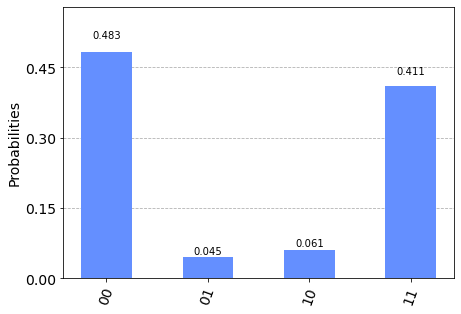

In [10]:
circuit = CircuitInitialize('1')
backend = IBMQ.get_provider().get_backend('ibmq_16_melbourne')
job_york = execute(circuit,backend,shots=1024)

results = job_york.result()
answer = results.get_counts(circuit)
plot_histogram(answer)

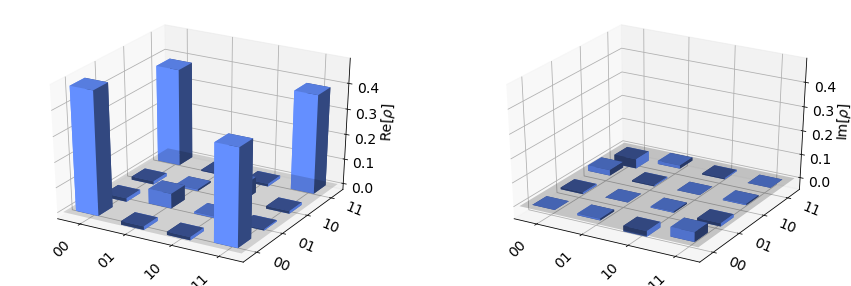

In [32]:
qr = QuantumRegister(2, "bit")
qc = QuantumCircuit(qr)

qc.h(qr)
qc.cx(qr[0],qr[1])
qc.rz(-np.pi/2,qr[1])
qc.cx(qr[0],qr[1])
qc.h(qr)
qc.x(qr)
qc.rz(np.pi/4,qr[1])
qc.cx(qr[0],qr[1])
qc.rz(-np.pi/4,qr[1])
qc.cx(qr[0],qr[1])
qc.rz(np.pi/4,qr[0])
qc.barrier()

qc.x(qr)
qc.h(qr)

backend = IBMQ.get_provider().get_backend('ibmq_16_melbourne')
     
# Generate the state tomography circuits.
qst_bell = state_tomography_circuits(qc, [qr[0],qr[1]])
job = qiskit.execute(qst_bell, backend, shots=1024)

tomo_bell = StateTomographyFitter(job.result(), qst_bell)

# outputs a density matrix
rho_bell = tomo_bell.fit()

#plot of the density matrix     
plot_state_city(rho_bell)